A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

In [978]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [979]:
# reading the dataset
house_df = pd.read_csv("train.csv")

In [980]:
# head
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA

In [981]:
# Shape of Dat frame
house_df.shape

(1460, 81)

In [982]:
# Data frame info
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [983]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [984]:
# all numeric (float and int) variables in the dataset
house_numeric = house_df.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [985]:
# Display all unique values of numerical data set
def DispNumVal(colName):
    print('%s values :-' % colName)
    print(house_numeric[colName].unique())
    print('\n')
    

[ DispNumVal(item) for item in house_numeric.columns]

Id values :-
[   1    2    3 ... 1458 1459 1460]


MSSubClass values :-
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


LotFrontage values :-
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]


LotArea values :-
[ 8450  9600 11250 ... 17217 13175  9717]


OverallQual values :-
[ 7  6  8  5  9  4 10  3  1  2]


OverallCond values :-
[5 8 6 7 4 2 3 9 1]


YearBuilt values :-
[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 19

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [986]:
# Getting the info for numerical data set
house_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

Here, although some variables are numeric (int), we'd rather treat them as categorical since they have discrete values.

In [987]:
# dropping the columns we want to treat as categorical variables
house_numeric = house_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
house_numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


Outlier Treatment

In [988]:
house_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.100000,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,...,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.050000,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,...,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,1445.410000,141.000000,37567.640000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,...,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


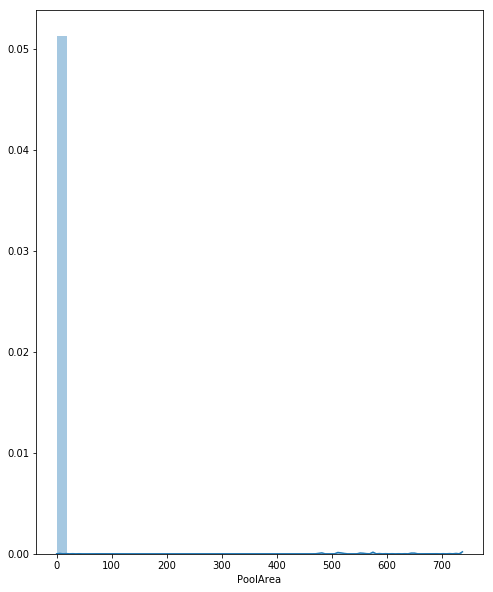

In [989]:
sns.distplot(house_df['PoolArea'])

(1453, 81)

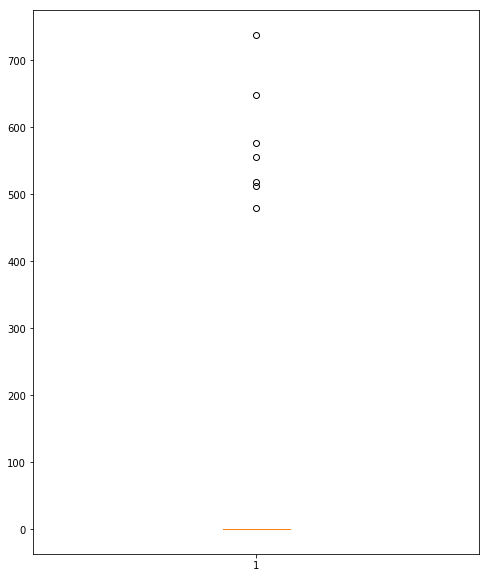

In [990]:
# outlier treatment
plt.boxplot(house_df['PoolArea'])
Q1 = house_df['PoolArea'].quantile(0.1)
Q3 = house_df['PoolArea'].quantile(0.9)
IQR = Q3 - Q1
house_df = house_df[(house_df['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (house_df['PoolArea'] <= Q3 + 1.5*IQR)]
house_df.shape

(1402, 81)

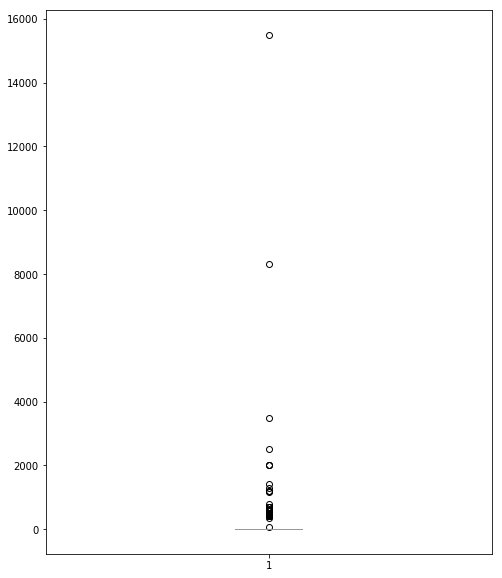

In [991]:
# outlier treatment
plt.boxplot(house_df['MiscVal'])
Q1 = house_df['MiscVal'].quantile(0.1)
Q3 = house_df['MiscVal'].quantile(0.9)
IQR = Q3 - Q1
house_df = house_df[(house_df['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (house_df['MiscVal'] <= Q3 + 1.5*IQR)]
house_df.shape

(1291, 81)

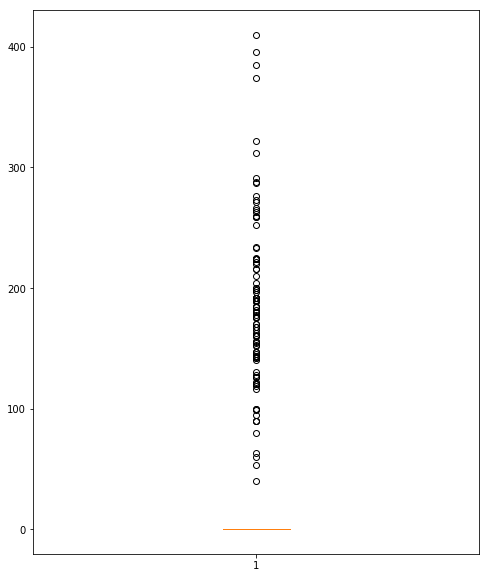

In [992]:
# outlier treatment
plt.boxplot(house_df['ScreenPorch'])
Q1 = house_df['ScreenPorch'].quantile(0.1)
Q3 = house_df['ScreenPorch'].quantile(0.9)
IQR = Q3 - Q1
house_df = house_df[(house_df['ScreenPorch'] >= Q1 - 1.5*IQR) & 
                      (house_df['ScreenPorch'] <= Q3 + 1.5*IQR)]
house_df.shape

(1274, 81)

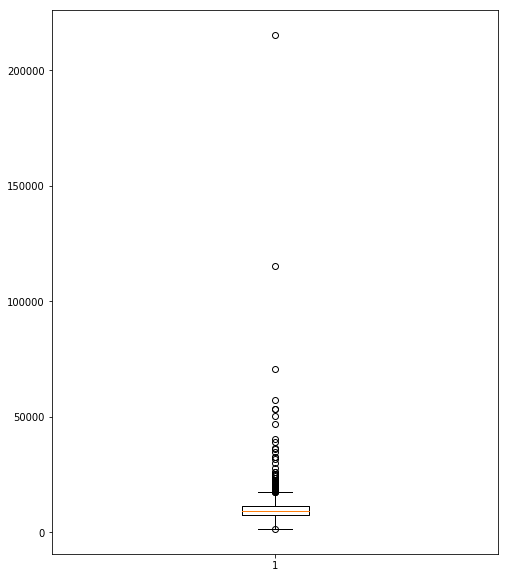

In [993]:
# outlier treatment
plt.boxplot(house_df['LotArea'])
Q1 = house_df['LotArea'].quantile(0.1)
Q3 = house_df['LotArea'].quantile(0.9)
IQR = Q3 - Q1
house_df = house_df[(house_df['LotArea'] >= Q1 - 1.5*IQR) & 
                      (house_df['LotArea'] <= Q3 + 1.5*IQR)]
house_df.shape

(1255, 81)

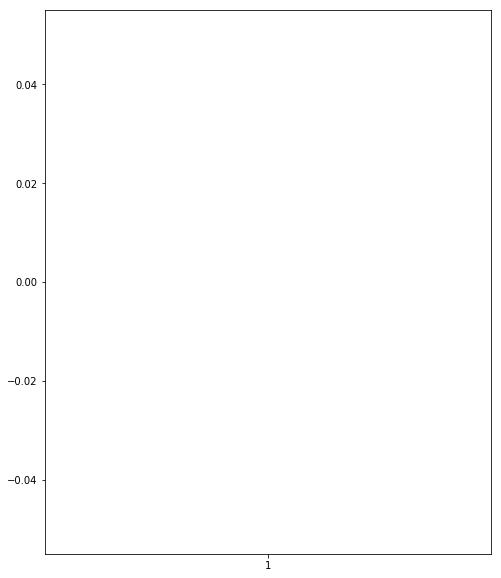

In [994]:
plt.boxplot(house_df['MasVnrArea'])
Q1 = house_df['MasVnrArea'].quantile(0.1)
Q3 = house_df['MasVnrArea'].quantile(0.9)
IQR = Q3 - Q1
house_df = house_df[(house_df['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (house_df['MasVnrArea'] <= Q3 + 1.5*IQR)]
house_df.shape

(1253, 81)

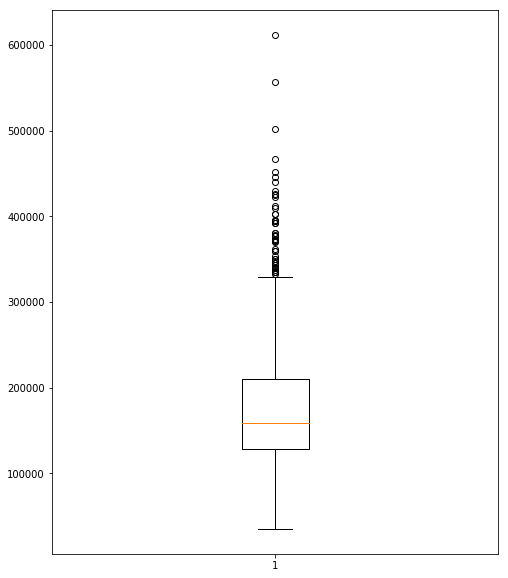

In [995]:
# outlier treatment
plt.boxplot(house_df['SalePrice'])
Q1 = house_df['SalePrice'].quantile(0.1)
Q3 = house_df['SalePrice'].quantile(0.9)
IQR = Q3 - Q1
house_df = house_df[(house_df['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (house_df['SalePrice'] <= Q3 + 1.5*IQR)]
house_df.shape

In [996]:
# correlation matrix
cor = house_numeric.corr()
cor

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.010601,-0.033226,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,...,0.008273,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,-0.021917
LotFrontage,-0.010601,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,...,0.402797,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,-0.033226,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,...,0.263116,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,-0.050298,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,...,0.390857,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,...,0.208171,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,...,-0.009640,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,...,0.240257,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,-0.015415,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,...,0.454868,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.010496,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,...,0.566024,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.005590,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,...,0.687501,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334


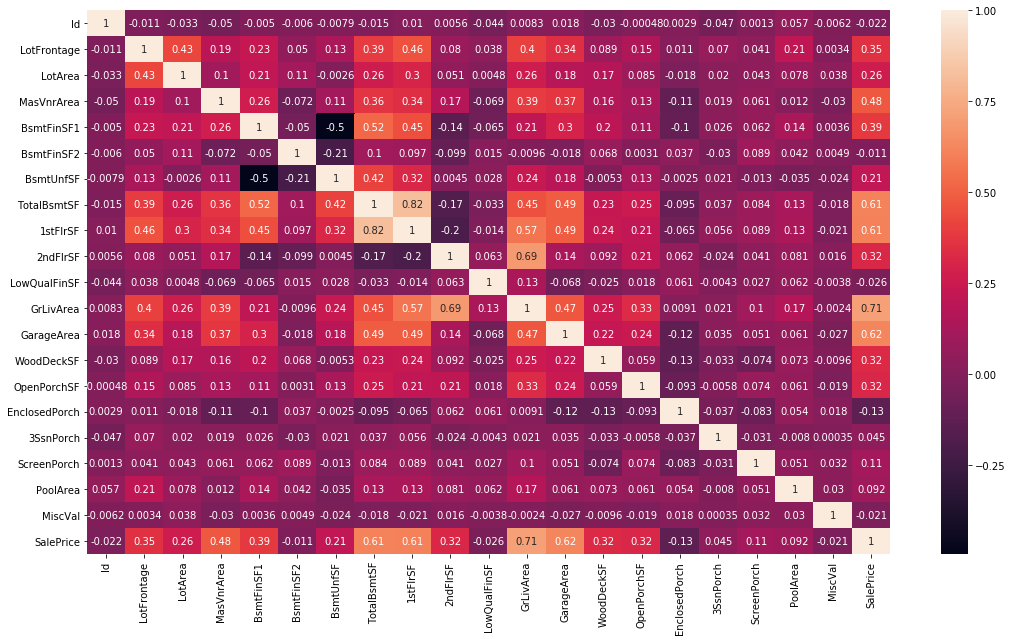

In [997]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, annot=True)
plt.show()

Dealing the missing values

In [998]:
# variable formats
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1459
Data columns (total 81 columns):
Id               1253 non-null int64
MSSubClass       1253 non-null int64
MSZoning         1253 non-null object
LotFrontage      1040 non-null float64
LotArea          1253 non-null int64
Street           1253 non-null object
Alley            82 non-null object
LotShape         1253 non-null object
LandContour      1253 non-null object
Utilities        1253 non-null object
LotConfig        1253 non-null object
LandSlope        1253 non-null object
Neighborhood     1253 non-null object
Condition1       1253 non-null object
Condition2       1253 non-null object
BldgType         1253 non-null object
HouseStyle       1253 non-null object
OverallQual      1253 non-null int64
OverallCond      1253 non-null int64
YearBuilt        1253 non-null int64
YearRemodAdd     1253 non-null int64
RoofStyle        1253 non-null object
RoofMatl         1253 non-null object
Exterior1st      1253 non-n

In [999]:
#checking the number of null values in the dataset
cols_nan = house_df.columns[house_df.isna().any()].tolist()
col_nan_df = house_df[cols_nan]
col_nan_df.isnull().sum()

LotFrontage      213
Alley           1171
BsmtQual          34
BsmtCond          34
BsmtExposure      35
BsmtFinType1      34
BsmtFinType2      35
Electrical         1
FireplaceQu      632
GarageType        78
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1253
Fence           1021
MiscFeature     1251
dtype: int64

In [1000]:
# Checking the percentage of missing values
round(100*(col_nan_df.isnull().sum()/len(col_nan_df.index)), 2)

LotFrontage      17.00
Alley            93.46
BsmtQual          2.71
BsmtCond          2.71
BsmtExposure      2.79
BsmtFinType1      2.71
BsmtFinType2      2.79
Electrical        0.08
FireplaceQu      50.44
GarageType        6.23
GarageYrBlt       6.23
GarageFinish      6.23
GarageQual        6.23
GarageCond        6.23
PoolQC          100.00
Fence            81.48
MiscFeature      99.84
dtype: float64

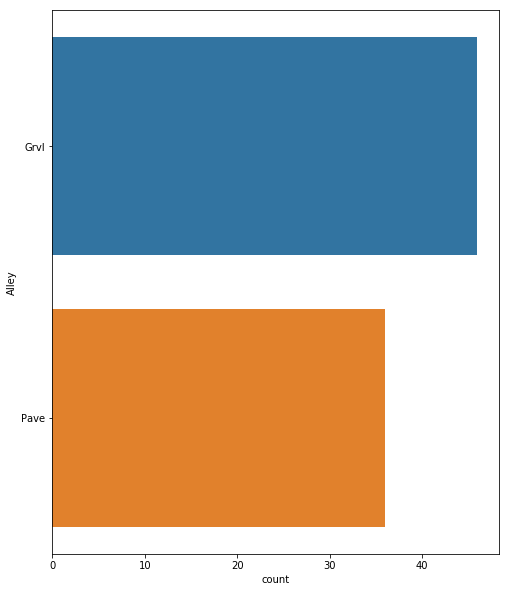

In [1001]:
# Checking the Alley column  - 93 percentage of nan's
sns.countplot(y=house_df['Alley'])

In [1002]:
house_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [1003]:
# As per data disctionary NA 	No alley access hence updating the nan with no alley
house_df['Alley'].fillna('No Alley', inplace=True)
#round(100*(col_nan_df.isnull().sum()/len(col_nan_df.index)), 2)

In [1004]:
house_df['Alley'].unique()

array(['No Alley', 'Grvl', 'Pave'], dtype=object)

In [1005]:
# Checking the percentage of missing values
col_nan_df.drop('Alley',axis =1, inplace = True)
col_nan_df.isnull().sum()
round(100*(col_nan_df.isnull().sum()/len(col_nan_df.index)), 2)

LotFrontage      17.00
BsmtQual          2.71
BsmtCond          2.71
BsmtExposure      2.79
BsmtFinType1      2.71
BsmtFinType2      2.79
Electrical        0.08
FireplaceQu      50.44
GarageType        6.23
GarageYrBlt       6.23
GarageFinish      6.23
GarageQual        6.23
GarageCond        6.23
PoolQC          100.00
Fence            81.48
MiscFeature      99.84
dtype: float64

In [1006]:
round(100*(col_nan_df.isnull().sum()/len(col_nan_df.index)), 2)

LotFrontage      17.00
BsmtQual          2.71
BsmtCond          2.71
BsmtExposure      2.79
BsmtFinType1      2.71
BsmtFinType2      2.79
Electrical        0.08
FireplaceQu      50.44
GarageType        6.23
GarageYrBlt       6.23
GarageFinish      6.23
GarageQual        6.23
GarageCond        6.23
PoolQC          100.00
Fence            81.48
MiscFeature      99.84
dtype: float64

In [1007]:
house_df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

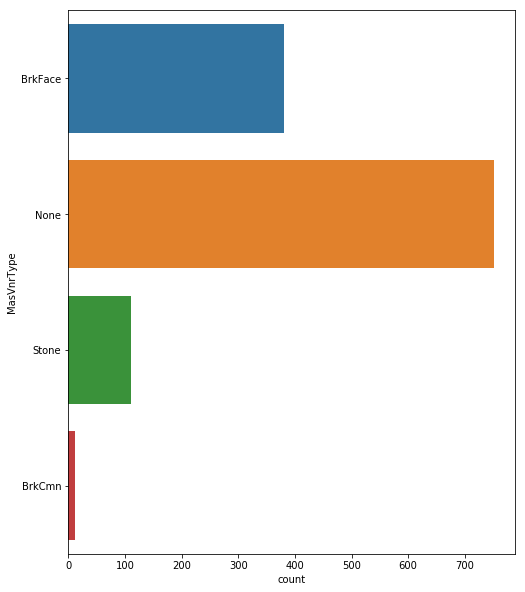

In [1008]:
sns.countplot(y=house_df['MasVnrType'])

In [1009]:
#NA in FireplaceQu column means No Fireplace, so we will replace NA by it.
house_df['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [1010]:
house_df['FireplaceQu'].unique()

array(['No Fireplace', 'TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

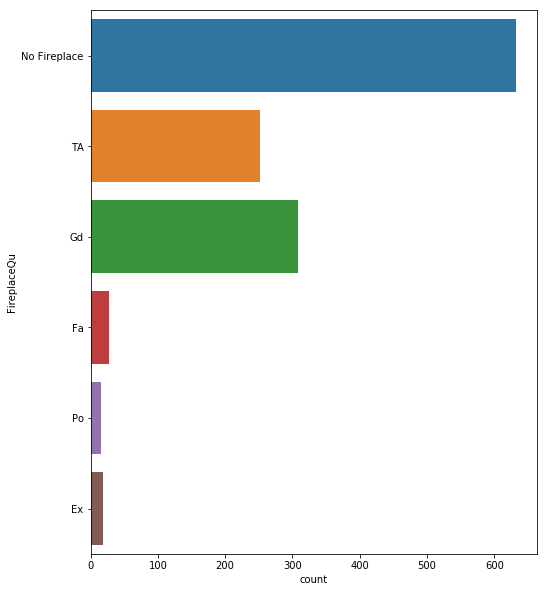

In [1011]:
sns.countplot(y=house_df['FireplaceQu'])

In [1012]:
# Checking the percentage of missing values
col_nan_df.drop('FireplaceQu',axis =1, inplace = True)
col_nan_df.isnull().sum()
round(100*(col_nan_df.isnull().sum()/len(col_nan_df.index)), 2)

LotFrontage      17.00
BsmtQual          2.71
BsmtCond          2.71
BsmtExposure      2.79
BsmtFinType1      2.71
BsmtFinType2      2.79
Electrical        0.08
GarageType        6.23
GarageYrBlt       6.23
GarageFinish      6.23
GarageQual        6.23
GarageCond        6.23
PoolQC          100.00
Fence            81.48
MiscFeature      99.84
dtype: float64

In [1013]:
house_df['PoolQC'].unique()

array([nan], dtype=object)

In [1014]:
#NA in PoolQC column means No Pool, so we will replace NA by it.
house_df['PoolQC'].fillna('No Pool', inplace=True) 

In [1015]:
house_df['PoolQC'].unique()

array(['No Pool'], dtype=object)

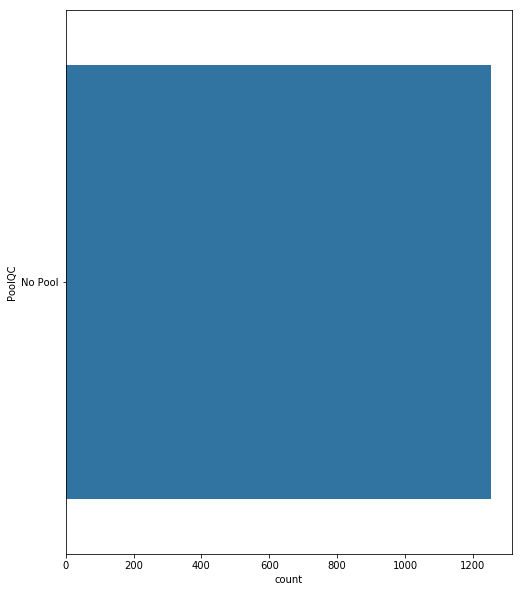

In [1016]:
sns.countplot(y=house_df['PoolQC'])

In [1017]:
# Checking the percentage of missing values
col_nan_df.drop('PoolQC',axis =1, inplace = True)
col_nan_df.isnull().sum()
round(100*(col_nan_df.isnull().sum()/len(col_nan_df.index)), 2)

LotFrontage     17.00
BsmtQual         2.71
BsmtCond         2.71
BsmtExposure     2.79
BsmtFinType1     2.71
BsmtFinType2     2.79
Electrical       0.08
GarageType       6.23
GarageYrBlt      6.23
GarageFinish     6.23
GarageQual       6.23
GarageCond       6.23
Fence           81.48
MiscFeature     99.84
dtype: float64

In [1018]:
house_df['Fence'].unique()

array([nan, 'GdWo', 'GdPrv', 'MnPrv', 'MnWw'], dtype=object)

In [1019]:
#NA in Fence column means No Fence, so we will replace NA by it.
house_df['Fence'].fillna('No Fence', inplace=True) 

In [1020]:
house_df['Fence'].unique()

array(['No Fence', 'GdWo', 'GdPrv', 'MnPrv', 'MnWw'], dtype=object)

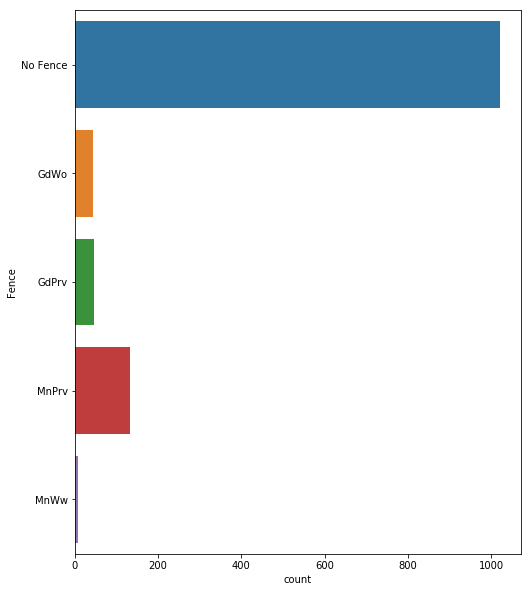

In [1021]:
sns.countplot(y=house_df['Fence'])

In [1022]:
# Checking the percentage of missing values
col_nan_df.drop('Fence',axis =1, inplace = True)
col_nan_df.isnull().sum()
round(100*(col_nan_df.isnull().sum()/len(col_nan_df.index)), 2)

LotFrontage     17.00
BsmtQual         2.71
BsmtCond         2.71
BsmtExposure     2.79
BsmtFinType1     2.71
BsmtFinType2     2.79
Electrical       0.08
GarageType       6.23
GarageYrBlt      6.23
GarageFinish     6.23
GarageQual       6.23
GarageCond       6.23
MiscFeature     99.84
dtype: float64

In [1023]:
house_df['MasVnrArea'].unique()

array([196.,   0., 162., 350., 186., 286., 306., 212., 380., 281., 640.,
       200., 246., 132., 650., 101., 412., 272., 456., 178., 573., 344.,
       287., 167., 104., 443., 468.,  66., 284.,  76., 203., 183.,  48.,
        28., 336., 768., 480., 184., 116., 266.,  85., 309.,  40., 136.,
       288.,  70., 320.,  50., 180., 120., 436., 252.,  84., 664., 226.,
       300., 653., 491., 748.,  98., 275., 138., 205., 260.,  64., 312.,
        16., 142., 290., 127., 220., 506., 297., 604., 254.,  36., 102.,
       108., 302., 172., 399., 270.,  46., 210., 174., 348., 299., 340.,
        68., 166.,  72.,  31.,  34., 238., 365.,  56., 150., 112., 278.,
       256., 225., 370., 388., 175., 296., 146., 113., 616.,  30., 106.,
       362., 500., 510., 305., 255., 125., 100., 432., 126., 473.,  74.,
       232., 376.,  42., 161., 110.,  18., 224., 248.,  80., 304., 215.,
       772., 435., 378., 562., 168.,  89., 285., 360.,  94., 333., 594.,
       268., 219., 188., 584., 182., 250., 292., 24

In [1024]:
# MasVnrArea NA will be updated to 0 as it shows none
house_df['MasVnrArea'].fillna(0, inplace=True) 

In [1025]:
house_df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  75.,  51.,  50.,  70.,  85.,  91.,
        nan,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,  74.,
       115.,  61.,  33., 100.,  24.,  89.,  63.,  76.,  72.,  81.,  69.,
        21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,  64.,  94.,
        90.,  55.,  48.,  88.,  82.,  71., 120., 107.,  92., 134.,  95.,
        62.,  86.,  54.,  99.,  67.,  83.,  43., 174.,  93.,  52.,  30.,
       129., 140.,  34.,  35.,  37., 118.,  87., 116., 111.,  49.,  96.,
        59.,  36.,  79., 102.,  58., 109.,  56., 130.,  53., 137.,  41.,
        97.,  45., 106.,  42.,  39., 144., 128., 149., 103., 313., 114.,
       168., 182., 138., 152., 153., 124.,  46.])

In [1026]:
house_df['LotFrontage'].fillna(0, inplace=True)

In [1027]:
house_df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  75.,  51.,  50.,  70.,  85.,  91.,
         0.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,  74.,
       115.,  61.,  33., 100.,  24.,  89.,  63.,  76.,  72.,  81.,  69.,
        21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,  64.,  94.,
        90.,  55.,  48.,  88.,  82.,  71., 120., 107.,  92., 134.,  95.,
        62.,  86.,  54.,  99.,  67.,  83.,  43., 174.,  93.,  52.,  30.,
       129., 140.,  34.,  35.,  37., 118.,  87., 116., 111.,  49.,  96.,
        59.,  36.,  79., 102.,  58., 109.,  56., 130.,  53., 137.,  41.,
        97.,  45., 106.,  42.,  39., 144., 128., 149., 103., 313., 114.,
       168., 182., 138., 152., 153., 124.,  46.])

In [1028]:
# Checking the percentage of missing values
col_nan_df.drop('LotFrontage',axis =1, inplace = True)
col_nan_df.isnull().sum()
round(100*(col_nan_df.isnull().sum()/len(col_nan_df.index)), 2)

BsmtQual         2.71
BsmtCond         2.71
BsmtExposure     2.79
BsmtFinType1     2.71
BsmtFinType2     2.79
Electrical       0.08
GarageType       6.23
GarageYrBlt      6.23
GarageFinish     6.23
GarageQual       6.23
GarageCond       6.23
MiscFeature     99.84
dtype: float64

In [1029]:
#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.

house_df['GarageType'].fillna('No Garage', inplace=True) 
house_df['GarageFinish'].fillna('No Garage', inplace=True) 
house_df['GarageQual'].fillna('No Garage', inplace=True) 
house_df['GarageCond'].fillna('No Garage', inplace=True) 

In [1030]:
# Checking the percentage of missing values
col_nan_df.drop(['GarageType','GarageFinish','GarageQual','GarageCond'],axis =1, inplace = True)
col_nan_df.isnull().sum()
round(100*(col_nan_df.isnull().sum()/len(col_nan_df.index)), 2)

BsmtQual         2.71
BsmtCond         2.71
BsmtExposure     2.79
BsmtFinType1     2.71
BsmtFinType2     2.79
Electrical       0.08
GarageYrBlt      6.23
MiscFeature     99.84
dtype: float64

In [1031]:
# MiscFeature column has almost 99% null values so we will drop it
house_df= house_df.drop('MiscFeature', axis=1)

In [1032]:
col_nan_df.drop(['MiscFeature'],axis =1, inplace = True)
col_nan_df.isnull().sum()
round(100*(col_nan_df.isnull().sum()/len(col_nan_df.index)), 2)

BsmtQual        2.71
BsmtCond        2.71
BsmtExposure    2.79
BsmtFinType1    2.71
BsmtFinType2    2.79
Electrical      0.08
GarageYrBlt     6.23
dtype: float64

In [1033]:
#converting year to number of years
house_df['YearBuilt'] = 2019 - house_df['YearBuilt']
house_df['YearRemodAdd'] = 2019 - house_df['YearRemodAdd']
house_df['GarageYrBlt'] = 2019 - house_df['GarageYrBlt']
house_df['YrSold'] = 2019 - house_df['YrSold']

In [1034]:
#converting from int type to object to treat the variables as categorical variables

house_df['MSSubClass'] = house_df['MSSubClass'].astype('object')
house_df['OverallQual'] = house_df['OverallQual'].astype('object')
house_df['OverallCond'] = house_df['OverallCond'].astype('object')
house_df['BsmtFullBath'] = house_df['BsmtFullBath'].astype('object')
house_df['BsmtHalfBath'] = house_df['BsmtHalfBath'].astype('object')
house_df['FullBath'] = house_df['FullBath'].astype('object')
house_df['HalfBath'] = house_df['HalfBath'].astype('object')
house_df['BedroomAbvGr'] = house_df['BedroomAbvGr'].astype('object')
house_df['KitchenAbvGr'] = house_df['KitchenAbvGr'].astype('object')
house_df['TotRmsAbvGrd'] = house_df['TotRmsAbvGrd'].astype('object')
house_df['Fireplaces'] = house_df['Fireplaces'].astype('object')
house_df['GarageCars'] = house_df['GarageCars'].astype('object')

In [1035]:
house_df['GarageYrBlt'].unique()

array([ 16.,  43.,  18.,  21.,  19.,  15.,  88.,  80.,  54.,  14.,  13.,
        59.,  28.,  61.,  89.,  17.,  51.,  12.,  11.,  62.,  99.,  53.,
        60.,  24.,  65.,  66.,  nan,  36.,  42.,  22.,  56.,  57.,  55.,
        20.,  46.,  84.,  29.,  49.,  74.,  32.,  30., 104.,  63.,  71.,
        45.,  10.,  69.,  58.,  98.,  34.,  40.,  50.,  26.,  52.,  83.,
        44.,  48.,  96.,  35.,  93.,  38.,  33., 103.,  87.,  47.,  39.,
        95.,  23.,  79.,  70.,  25.,  31., 109.,  41.,  37.,  68.,  27.,
        94.,  64.,  78.,   9.,  92., 101.,  72.,  82.,  77.,  81.,  67.,
        91.,  97.,  85., 113., 105.,  73.,  90.,  86.])

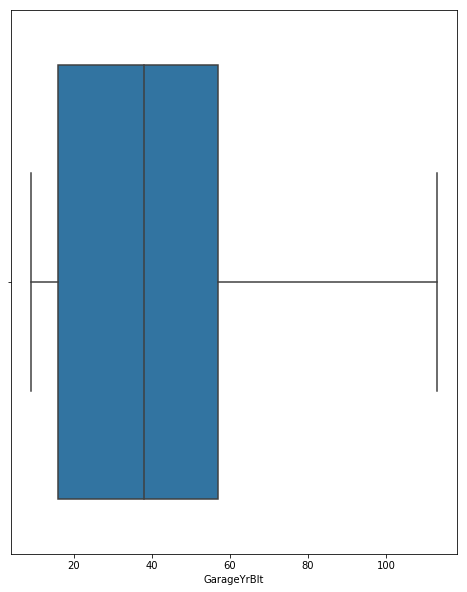

In [1036]:
sns.boxplot(house_df['GarageYrBlt'])

#ax = sns.countplot(x="Column", data=ds)

#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#plt.tight_layout()
#plt.show()

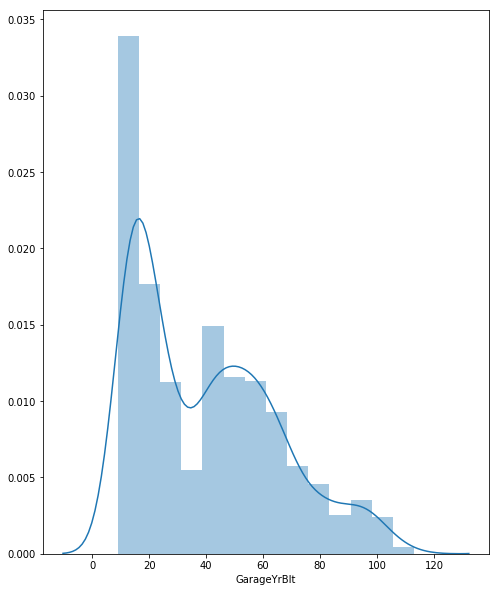

In [1037]:
sns.distplot(house_df['GarageYrBlt'].dropna())

In [1038]:
GarageYrBlt_med = house_df['GarageYrBlt'].median(skipna = True)
house_df['GarageYrBlt'].fillna(GarageYrBlt_med, inplace=True)

In [1039]:
house_df['GarageYrBlt'].unique()

array([ 16.,  43.,  18.,  21.,  19.,  15.,  88.,  80.,  54.,  14.,  13.,
        59.,  28.,  61.,  89.,  17.,  51.,  12.,  11.,  62.,  99.,  53.,
        60.,  24.,  65.,  66.,  38.,  36.,  42.,  22.,  56.,  57.,  55.,
        20.,  46.,  84.,  29.,  49.,  74.,  32.,  30., 104.,  63.,  71.,
        45.,  10.,  69.,  58.,  98.,  34.,  40.,  50.,  26.,  52.,  83.,
        44.,  48.,  96.,  35.,  93.,  33., 103.,  87.,  47.,  39.,  95.,
        23.,  79.,  70.,  25.,  31., 109.,  41.,  37.,  68.,  27.,  94.,
        64.,  78.,   9.,  92., 101.,  72.,  82.,  77.,  81.,  67.,  91.,
        97.,  85., 113., 105.,  73.,  90.,  86.])

In [1040]:
col_nan_df.drop(['GarageYrBlt'],axis =1, inplace = True)
col_nan_df.isnull().sum()
round(100*(col_nan_df.isnull().sum()/len(col_nan_df.index)), 2)

BsmtQual        2.71
BsmtCond        2.71
BsmtExposure    2.79
BsmtFinType1    2.71
BsmtFinType2    2.79
Electrical      0.08
dtype: float64

In [1041]:
house_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

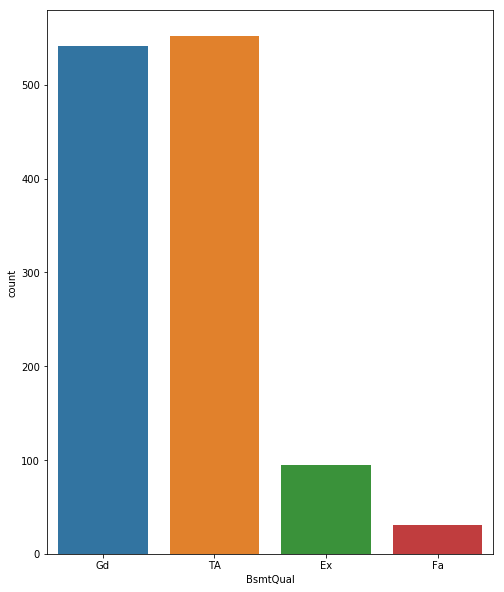

In [1042]:
sns.countplot(house_df['BsmtQual'])

In [1043]:
house_df['BsmtQual'].fillna('No Basement', inplace=True) 

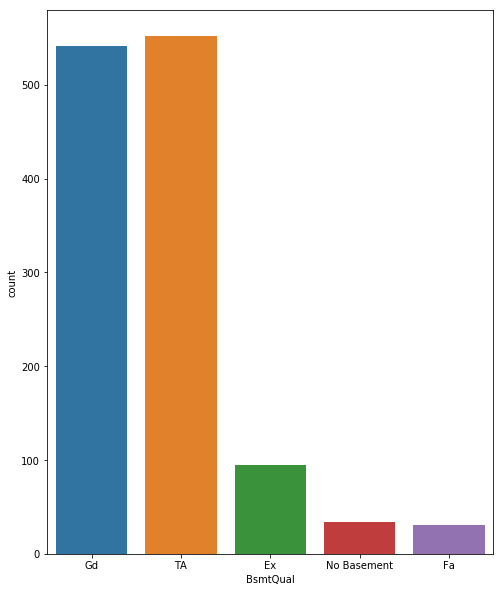

In [1044]:
sns.countplot(house_df['BsmtQual'])

In [1045]:
col_nan_df.drop(['BsmtQual'],axis =1, inplace = True)
col_nan_df.isnull().sum()
round(100*(col_nan_df.isnull().sum()/len(col_nan_df.index)), 2)

BsmtCond        2.71
BsmtExposure    2.79
BsmtFinType1    2.71
BsmtFinType2    2.79
Electrical      0.08
dtype: float64

In [1046]:
house_df['BsmtCond'].fillna('No Basement', inplace=True)
house_df['BsmtExposure'].fillna('No Basement', inplace=True)
house_df['BsmtFinType1'].fillna('No Basement', inplace=True) 
house_df['BsmtFinType2'].fillna('No Basement', inplace=True) 

In [1047]:
col_nan_df.drop(['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'],axis =1, inplace = True)
col_nan_df.isnull().sum()
round(100*(col_nan_df.isnull().sum()/len(col_nan_df.index)), 2)

Electrical    0.08
dtype: float64

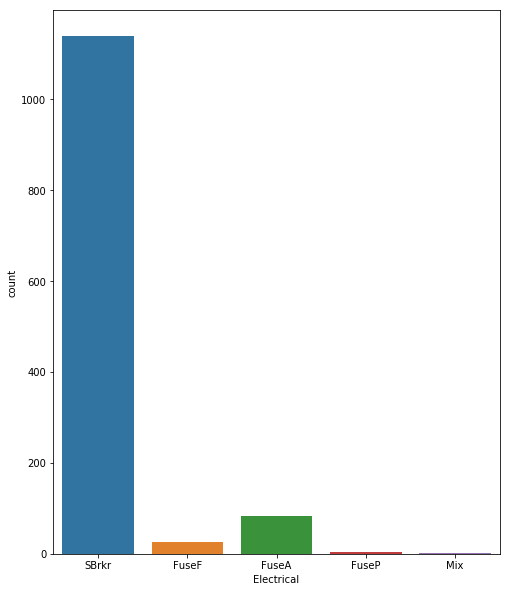

In [1048]:
sns.countplot(house_df['Electrical'])

In [1049]:
house_df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [1050]:
house_df['Electrical'].fillna('SBrkr', inplace=True)

In [1051]:
col_nan_df.drop(['Electrical'],axis =1, inplace = True)
col_nan_df.isnull().sum()
round(100*(col_nan_df.isnull().sum()/len(col_nan_df.index)), 2)

Series([], dtype: float64)

In [1052]:
house_df.shape


(1253, 80)

In [1053]:
round(100*(house_df.isnull().sum()/len(house_df.index)), 2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
                ... 
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF   

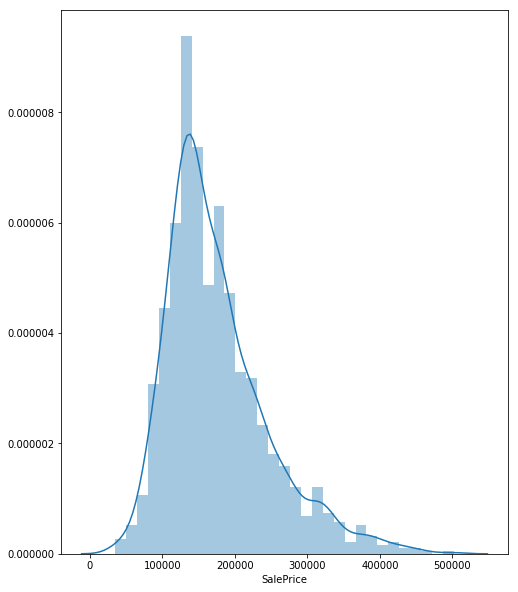

In [1054]:
sns.distplot(house_df['SalePrice'])

In [1055]:
house_df_final = house_df

Dummy Variables

In [1056]:
# split into X and y
house_df_final = house_df_final.drop([ 'Id'], axis=1)

In [1057]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = house_df_final.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [1058]:
# convert into dummies
hse_dum = pd.get_dummies(house_categorical, drop_first=True)
hse_dum.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [1059]:
# drop categorical variables 
house_df_final = house_df_final.drop(list(house_categorical.columns), axis=1)

In [1060]:
# concat dummy variables with housing_df_final
house_df_final = pd.concat([house_df_final, hse_dum], axis=1)

In [1061]:
house_df_final.shape


(1253, 303)

In [1062]:
X = house_df_final
y = np.log1p(X.SalePrice)
#np.log1p(train["SalePrice"])
# Remove the target variable from X
X = X.drop("SalePrice",1) 
#X= X.drop(["OverallQual_10","OverallQual_9","OverallCond_9","BsmtFullBath_2","FullBath_3"],axis =1)

In [1063]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [1064]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Model Building and Evaluation

# Using Rige Regression

In [1065]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1066]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 4.0}
-0.07490417118100275


In [1067]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.033510,0.041681,0.003790,3.117265e-03,0.0001,{'alpha': 0.0001},-0.107101,-0.118396,-0.089144,-0.085231,...,-0.095607,0.014921,27,-0.045388,-0.047228,-0.048707,-0.046783,-0.051677,-0.047957,0.002141
1,0.013165,0.000400,0.001795,3.990417e-04,0.001,{'alpha': 0.001},-0.106484,-0.117546,-0.089020,-0.085738,...,-0.095180,0.014763,25,-0.045426,-0.047257,-0.048715,-0.046824,-0.051735,-0.047991,0.002146
2,0.017156,0.002919,0.002197,3.989103e-04,0.01,{'alpha': 0.01},-0.102230,-0.112876,-0.088197,-0.087312,...,-0.092724,0.013729,24,-0.045872,-0.047423,-0.048794,-0.047107,-0.052193,-0.048278,0.002167
3,0.012168,0.002475,0.002793,2.129263e-03,0.05,{'alpha': 0.05},-0.095936,-0.100897,-0.086642,-0.086694,...,-0.088075,0.010524,23,-0.047014,-0.047948,-0.049137,-0.047673,-0.053029,-0.048960,0.002148
4,0.010174,0.001596,0.001595,4.878192e-04,0.1,{'alpha': 0.1},-0.093690,-0.093476,-0.085936,-0.085603,...,-0.085373,0.009322,21,-0.047685,-0.048557,-0.049429,-0.048117,-0.053610,-0.049480,0.002144
5,0.012767,0.003645,0.002194,7.444177e-04,0.2,{'alpha': 0.2},-0.091428,-0.087153,-0.085080,-0.084088,...,-0.082746,0.008778,19,-0.048427,-0.049553,-0.049879,-0.048778,-0.054276,-0.050183,0.002112
6,0.009776,0.001713,0.001793,7.500984e-04,0.3,{'alpha': 0.3},-0.089754,-0.084196,-0.084513,-0.083046,...,-0.081232,0.008628,18,-0.048923,-0.050211,-0.050209,-0.049270,-0.054701,-0.050663,0.002082
7,0.011769,0.000745,0.001595,4.881889e-04,0.4,{'alpha': 0.4},-0.088473,-0.082296,-0.084037,-0.082307,...,-0.080195,0.008492,17,-0.049343,-0.050699,-0.050469,-0.049689,-0.055037,-0.051047,0.002055
8,0.010772,0.001163,0.000997,8.714517e-07,0.5,{'alpha': 0.5},-0.087441,-0.080932,-0.083621,-0.081718,...,-0.079407,0.008366,16,-0.049732,-0.051091,-0.050720,-0.050051,-0.055321,-0.051383,0.002027
9,0.012168,0.001934,0.001995,6.309791e-04,0.6,{'alpha': 0.6},-0.086574,-0.079946,-0.083249,-0.081265,...,-0.078785,0.008269,14,-0.050063,-0.051413,-0.050930,-0.050363,-0.055562,-0.051667,0.002003


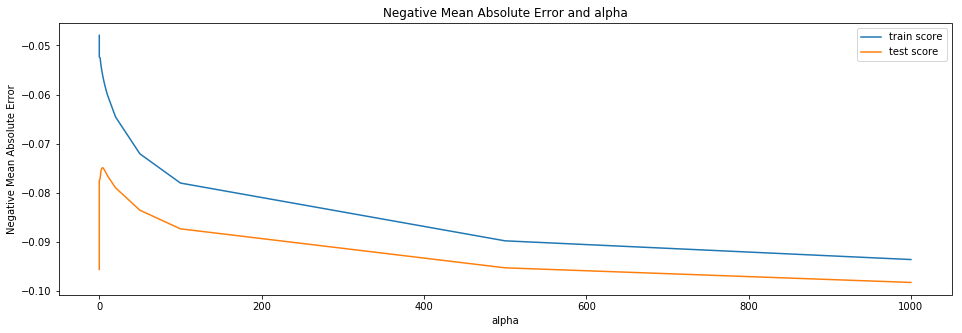

In [1068]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

from the above graph and the bestparam score we got optimum lambda to be 4

In [1069]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.26490672e-04,  8.81525977e-06, -2.81127332e-03, -1.14205440e-03,
        2.26003357e-05,  5.95467888e-05,  6.13006899e-05, -2.20863392e-05,
        9.87611460e-05,  7.83161492e-05,  1.13603274e-04, -5.78196590e-06,
        1.86137464e-04,  4.00896588e-04,  1.30158275e-04,  1.15506487e-04,
        2.26165419e-04,  1.19184657e-04,  2.31678910e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.10858284e-04,  1.69143719e-04,
       -1.24796886e-02,  7.45524761e-03,  2.23882302e-02,  6.61634279e-03,
       -3.96062555e-02,  4.84776059e-02,  2.39240186e-02, -2.16655852e-02,
       -1.47641583e-02, -1.71727851e-02,  2.12445344e-02, -6.62866288e-02,
       -1.67800252e-02,  4.09527826e-03,  7.15792251e-02,  1.07629314e-02,
        2.93887768e-02,  4.29589432e-03, -2.02720937e-02,  2.14722948e-02,
        3.66591196e-02, -1.20667450e-02, -5.08030534e-02,  5.57678704e-03,
        1.69649306e-02, -2.87335283e-02,  1.06666879e-02,  2.88779304e-02,
       -4.32345985e-02, -

In [1070]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9542381939584222


In [1071]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8859707427162177


In [1072]:
# CHecking MSE on test data
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

0.019327335894151716

# Lasso Regression

In [1073]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1074]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.07634141911945169


In [1075]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.178328,0.071533,0.000996,9.853353e-06,0.0001,{'alpha': 0.0001},-0.084306,-0.074927,-0.080971,-0.080654,...,-0.076341,0.008321,1,-0.051654,-0.052920,-0.052679,-0.052222,-0.056949,-0.053285,0.001882
1,0.025133,0.003536,0.001397,4.882669e-04,0.001,{'alpha': 0.001},-0.083405,-0.081918,-0.086646,-0.081534,...,-0.080065,0.006867,2,-0.066842,-0.067862,-0.065242,-0.068508,-0.070380,-0.067767,0.001710
2,0.010771,0.000400,0.001396,4.861508e-04,0.01,{'alpha': 0.01},-0.103661,-0.103214,-0.107716,-0.104664,...,-0.101130,0.007535,3,-0.097205,-0.097043,-0.095140,-0.097987,-0.101289,-0.097733,0.002009
3,0.043882,0.008695,0.001796,7.472584e-04,0.05,{'alpha': 0.05},-0.104816,-0.107009,-0.110253,-0.107557,...,-0.103756,0.007510,6,-0.100530,-0.099341,-0.097913,-0.100225,-0.104244,-0.100450,0.002103
4,0.035705,0.004522,0.001795,3.990889e-04,0.1,{'alpha': 0.1},-0.103160,-0.107278,-0.110802,-0.107658,...,-0.103614,0.007618,5,-0.100860,-0.099407,-0.098104,-0.100406,-0.104436,-0.100643,0.002120
5,0.037101,0.007938,0.001994,8.714517e-07,0.2,{'alpha': 0.2},-0.101443,-0.108068,-0.111721,-0.107822,...,-0.103595,0.008046,4,-0.101168,-0.099834,-0.098512,-0.100526,-0.104730,-0.100954,0.002083
6,0.024135,0.005477,0.001597,7.992509e-04,0.3,{'alpha': 0.3},-0.101530,-0.108764,-0.112624,-0.108072,...,-0.104052,0.008204,7,-0.101837,-0.100321,-0.099261,-0.100999,-0.105327,-0.101549,0.002069
7,0.024734,0.005441,0.001995,6.312800e-04,0.4,{'alpha': 0.4},-0.102206,-0.109557,-0.113649,-0.108377,...,-0.104761,0.008231,8,-0.102552,-0.101023,-0.100096,-0.101758,-0.106032,-0.102292,0.002039
8,0.017751,0.002555,0.001798,7.479598e-04,0.5,{'alpha': 0.5},-0.102898,-0.110453,-0.114801,-0.108407,...,-0.105545,0.008142,9,-0.103404,-0.101883,-0.101224,-0.102501,-0.106903,-0.103183,0.001994
9,0.016355,0.001739,0.001996,6.313549e-04,0.6,{'alpha': 0.6},-0.103788,-0.111254,-0.116409,-0.108324,...,-0.106475,0.008055,10,-0.104339,-0.102862,-0.102432,-0.103422,-0.107883,-0.104188,0.001954


In [1076]:
#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [1077]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.161767,4.560083e-02,0.002993,1.546096e-03,0.0001,{'alpha': 0.0001},0.908163,0.897507,0.918257,0.893551,...,0.912338,0.018143,1,0.963539,0.963625,0.959520,0.963902,0.957304,0.961578,0.002681
1,0.023935,3.568386e-03,0.001797,7.470695e-04,0.001,{'alpha': 0.001},0.915891,0.896902,0.904664,0.904945,...,0.911005,0.012401,2,0.936765,0.940032,0.936791,0.938216,0.934737,0.937308,0.001756
2,0.012963,4.547103e-03,0.001796,3.989460e-04,0.01,{'alpha': 0.01},0.879465,0.836281,0.860674,0.833936,...,0.855971,0.018063,3,0.862193,0.870016,0.865881,0.871171,0.865264,0.866905,0.003281
3,0.046475,1.052839e-02,0.001596,4.882087e-04,0.05,{'alpha': 0.05},0.875443,0.824053,0.852138,0.826551,...,0.847262,0.019525,5,0.850655,0.862864,0.856709,0.863240,0.856339,0.857961,0.004679
4,0.040492,4.487008e-03,0.001996,6.306039e-04,0.1,{'alpha': 0.1},0.877866,0.823349,0.850522,0.827450,...,0.847417,0.020138,4,0.849389,0.862511,0.856138,0.862091,0.855411,0.857108,0.004846
5,0.034108,8.610404e-03,0.001995,5.840039e-07,0.2,{'alpha': 0.2},0.880421,0.820448,0.847813,0.828123,...,0.846789,0.021382,6,0.847765,0.861421,0.854926,0.861038,0.854376,0.855905,0.005027
6,0.022938,5.850304e-03,0.001801,7.481051e-04,0.3,{'alpha': 0.3},0.881049,0.817541,0.844629,0.828299,...,0.845484,0.022160,7,0.845479,0.860012,0.853090,0.859353,0.852842,0.854155,0.005281
7,0.023537,6.573460e-03,0.001197,3.994712e-04,0.4,{'alpha': 0.4},0.880704,0.813965,0.840909,0.827783,...,0.843462,0.022915,8,0.843252,0.858042,0.850926,0.857219,0.850954,0.852078,0.005338
8,0.018346,2.718165e-03,0.001596,4.888703e-04,0.5,{'alpha': 0.5},0.879874,0.809932,0.836594,0.827814,...,0.841090,0.023585,9,0.840535,0.855620,0.848172,0.855195,0.848542,0.849613,0.005530
9,0.016156,1.932489e-03,0.001795,3.992566e-04,0.6,{'alpha': 0.6},0.878627,0.806526,0.831924,0.828052,...,0.838586,0.023996,10,0.837373,0.853351,0.845060,0.853000,0.845591,0.846875,0.005911


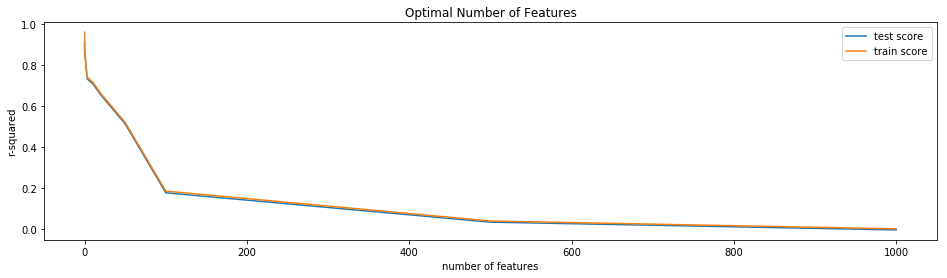

In [1078]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [1079]:
#checking the value of optimum number of parameters
print(model_cv1.best_params_)
print(model_cv1.best_score_)

{'alpha': 0.0001}
0.9123382391509477


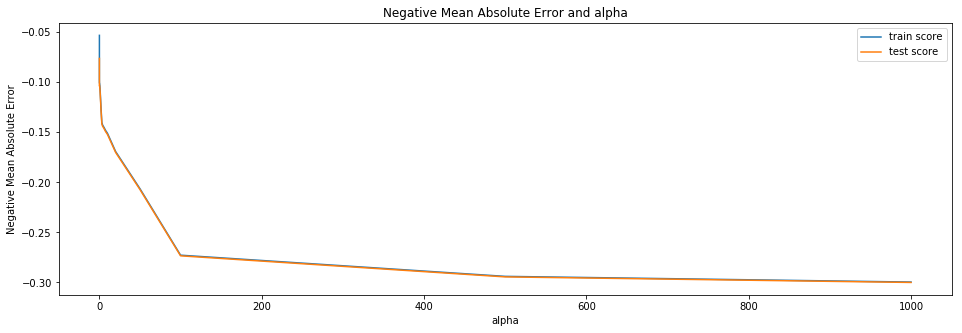

In [1080]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [1081]:
   alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [1082]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9574280591700935


In [1083]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [1084]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8815862250078845


In [1085]:
# CHecking MSE on test data
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

0.020070487682573156

In [1086]:
###Model Lasso regression printing coefficients
coef = pd.Series(lasso.coef_, index = X_train.columns)
coef.head

<bound method NDFrame.head of LotFrontage             -0.000117
LotArea                  0.000009
YearBuilt               -0.003060
YearRemodAdd            -0.000975
MasVnrArea               0.000017
BsmtFinSF1               0.000114
BsmtFinSF2               0.000113
BsmtUnfSF                0.000044
TotalBsmtSF              0.000032
1stFlrSF                 0.000206
2ndFlrSF                 0.000247
LowQualFinSF             0.000128
GrLivArea                0.000048
GarageYrBlt              0.000347
GarageArea               0.000138
WoodDeckSF               0.000113
OpenPorchSF              0.000212
EnclosedPorch            0.000114
3SsnPorch                0.000238
ScreenPorch              0.000000
PoolArea                 0.000000
MiscVal                  0.000000
MoSold                  -0.000464
YrSold                   0.000818
MSSubClass_30           -0.006193
MSSubClass_40            0.000000
MSSubClass_45            0.024109
MSSubClass_50            0.003239
MSSubClass_60     

In [1087]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 211 variables and eliminated the other 91 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

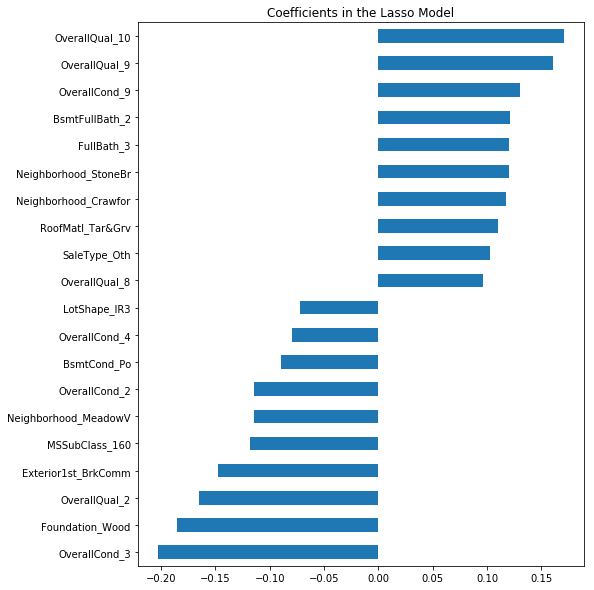

In [1088]:
#Top most and least coeff values of predictor varaibles plotted
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [1089]:
#Part-II Ques 1 Incresing lambda effect on coefficients check
model_param = list(lasso.coef_)
#model_param.insert(0,lasso.intercept_)
cols = X_train.columns
#cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coefficient']
lasso_coef

,Feature,Coefficient
0,LotFrontage,-0.000117
1,LotArea,0.000009
2,YearBuilt,-0.003060
3,YearRemodAdd,-0.000975
4,MasVnrArea,0.000017
5,BsmtFinSF1,0.000114
6,BsmtFinSF2,0.000113
7,BsmtUnfSF,0.000044
8,TotalBsmtSF,0.000032
9,1stFlrSF,0.000206


In [1090]:
#sorting the features based on coefficients obtained from Lasso
lasso_coef.sort_values('Coefficient',ascending=False,inplace=True)
lasso_coef.head(15)

,Feature,Coefficient
113,OverallQual_10,0.170777
112,OverallQual_9,0.160673
121,OverallCond_9,0.130145
213,BsmtFullBath_2,0.121457
219,FullBath_3,0.120176
78,Neighborhood_StoneBr,0.120018
62,Neighborhood_Crawfor,0.117492
129,RoofMatl_Tar&Grv,0.110283
295,SaleType_Oth,0.102429
111,OverallQual_8,0.096352


In [1091]:
# Part -II Ques 1.. trying to get coeff values on increasing Lambda in Lasso regression
names = X.columns

In [1092]:
# Part -II Ques 1.. trying to get coeff values on increasing Lambda in Lasso regression
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X, y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the datafram    
    return df

In [1093]:
# Run the function called, Lasso for different lambda values
lasso([.0001, 0.0002,0.0004,0.1,0.5])

,Feature Name,Alpha = 0.000100,Alpha = 0.000200,Alpha = 0.000400,Alpha = 0.100000,Alpha = 0.500000
0,LotFrontage,0.000086,0.000096,0.000072,0.000026,0.000000
1,LotArea,0.000006,0.000006,0.000005,0.000009,0.000008
2,YearBuilt,-0.002446,-0.002431,-0.002564,-0.003058,-0.002570
3,YearRemodAdd,-0.000872,-0.000992,-0.001231,-0.003348,-0.002391
4,MasVnrArea,0.000001,0.000007,0.000013,0.000035,0.000025
5,BsmtFinSF1,0.000125,0.000135,0.000147,0.000112,0.000110
6,BsmtFinSF2,0.000131,0.000130,0.000121,0.000013,0.000000
7,BsmtUnfSF,0.000052,0.000054,0.000058,-0.000000,-0.000000
8,TotalBsmtSF,0.000040,0.000041,0.000044,0.000175,0.000198
9,1stFlrSF,0.000220,0.000225,0.000231,0.000179,0.000058


In [1094]:
# Part -II Ques 1.. trying to get coeff values on increasing Lambda in ridge regression
def reidge(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        ridge11 = Ridge(alpha=alpha)
        
        # Fit the lasso regression
        ridge11.fit(X, y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = ridge11.coef_
        
    # Return the datafram    
    return df

In [1095]:
# Run the function called, ridge for differnt values of lambda
reidge([4,8,16,50,100])

,Feature Name,Alpha = 4.000000,Alpha = 8.000000,Alpha = 16.000000,Alpha = 50.000000,Alpha = 100.000000
0,LotFrontage,0.000046,0.000045,0.000046,0.000059,0.000072
1,LotArea,0.000006,0.000006,0.000006,0.000006,0.000007
2,YearBuilt,-0.002411,-0.002415,-0.002429,-0.002501,-0.002603
3,YearRemodAdd,-0.001008,-0.001180,-0.001409,-0.001901,-0.002247
4,MasVnrArea,0.000003,0.000008,0.000015,0.000030,0.000038
5,BsmtFinSF1,0.000063,0.000068,0.000074,0.000086,0.000093
6,BsmtFinSF2,0.000062,0.000062,0.000060,0.000052,0.000046
7,BsmtUnfSF,-0.000017,-0.000017,-0.000016,-0.000012,-0.000008
8,TotalBsmtSF,0.000108,0.000113,0.000118,0.000126,0.000131
9,1stFlrSF,0.000077,0.000084,0.000092,0.000103,0.000107
